# 3D Stellar Plot

# WARNING! - This currently plots the supernovae in the wrong location...

  MAIN_ID         RA           DEC      ... FLUX_QUAL_V FLUX_UNIT_V subgroup
               "h:m:s"       "d:m:s"    ...                                 
----------- ------------- ------------- ... ----------- ----------- --------
  * eta Lup 16 00 07.3278 -38 23 48.151 ...           C           V      UCL
  HD 143699 16 03 24.1894 -38 36 09.152 ...           C           V      UCL
  HD 150742 16 44 42.5932 -40 50 22.829 ...           D           V      UCL
* psi02 Lup 15 42 41.0220 -34 42 37.461 ...           D           V      UCL
  HD 140784 15 46 44.2172 -34 40 56.826 ...           D           V      UCL
  * tet Lup 16 06 35.5467 -36 48 08.156 ...           D           V      UCL
  HD 148247 16 28 14.4697 -37 10 47.577 ...           D           V      UCL
   HR  6100 16 24 31.7563 -37 33 57.765 ...           D           V      UCL
  HD 144987 16 09 52.5899 -33 32 44.896 ...           D           V      UCL
    * N Sco 16 31 22.9330 -34 42 15.714 ...           C           V      UCL

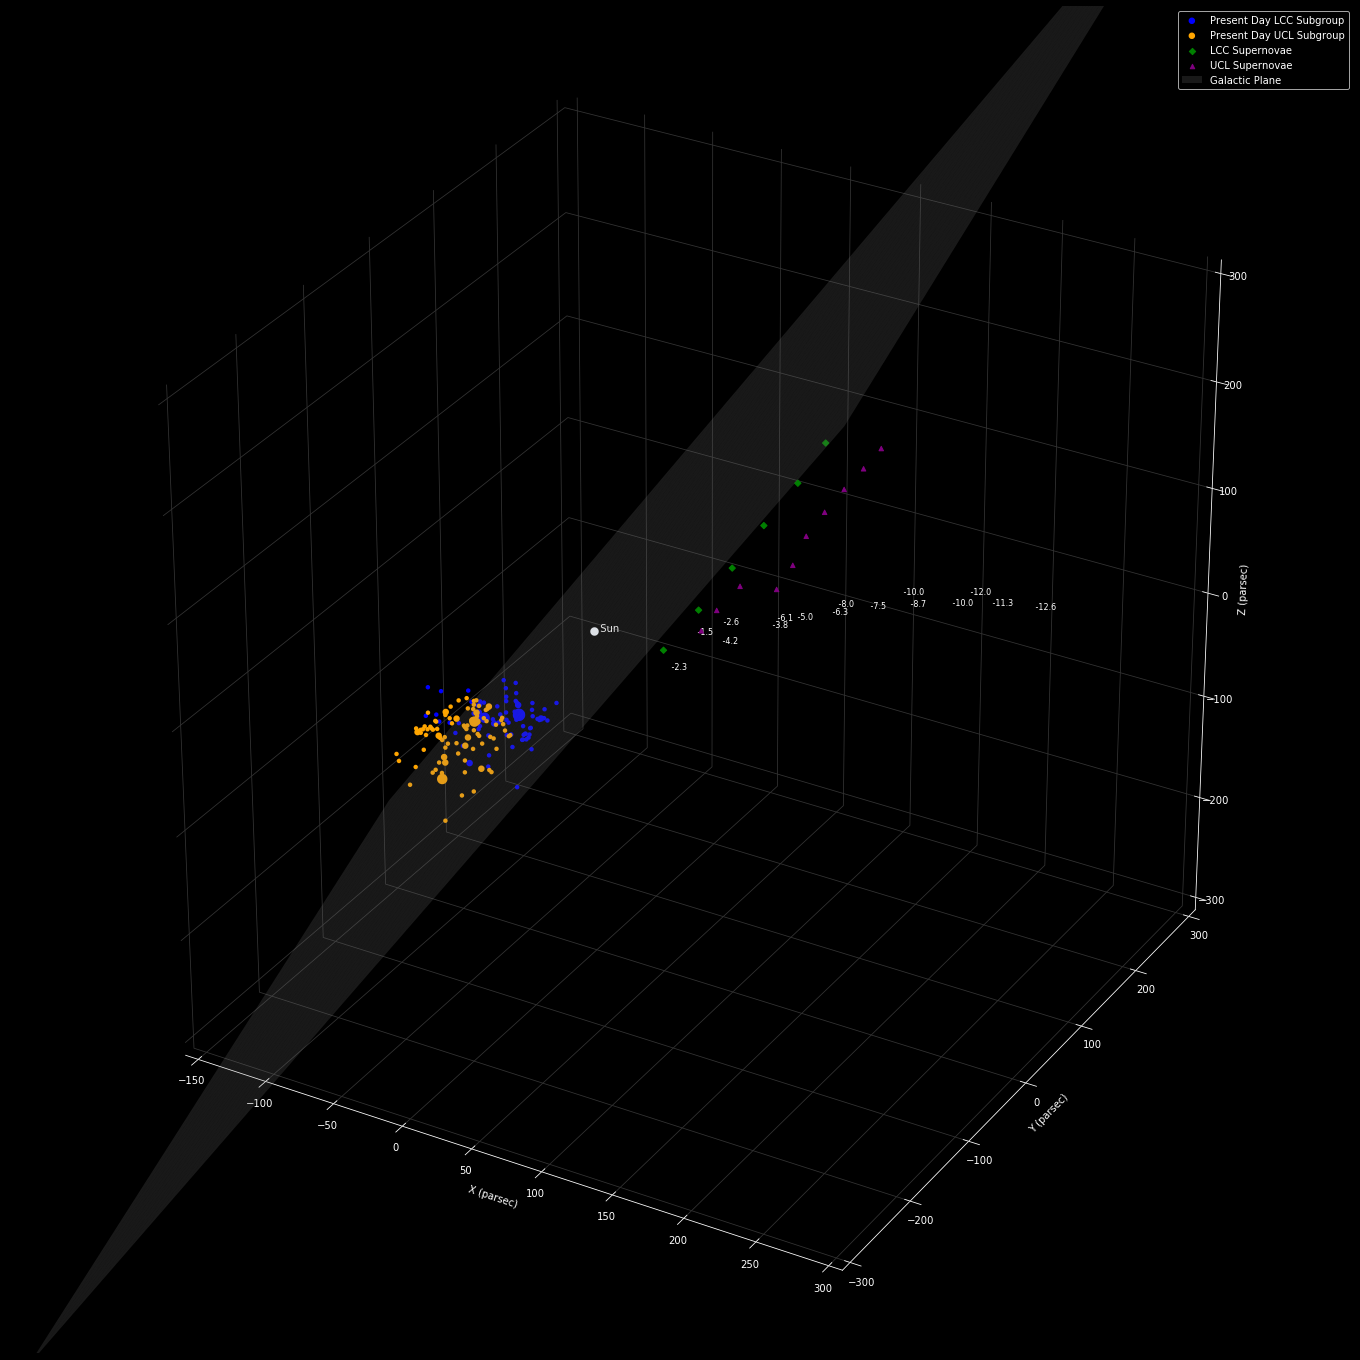

In [1]:
# # Todo
# [] Figure out astropy cartesian coordinate directions.  Explicit XYZ to UVW mapping.
# [] Figure out SIMBAD reference frame for RA/DEC and then correctly convert SkyCoord object using the same reference frame.  See: https://astroquery.readthedocs.io/en/latest/simbad/simbad.html
# >>> customSimbad.add_votable_fields('ra(2;A;ICRS;J2017.5;2000)', 'dec(2;D;ICRS;2017.5;2000)')
# 

# In[1]:


#get_ipython().run_line_magic('matplotlib', 'notebook')
#%matplotlib inline


# In[2]:

import time

from pygments import highlight
from pygments.lexers import PythonLexer
from pygments.formatters import Terminal256Formatter
from pprint import pformat

def pprint_color(obj):
    print(highlight(pformat(obj), PythonLexer(), Terminal256Formatter()))

from astropy.table import Table, vstack
from astroquery.simbad import conf
# Available SIMBAD mirrors.
#conf.server = "simbad.u-strasbg.fr"
conf.server = "simbad.harvard.edu"  # Harvard's mirror is generally much faster than the main Strasbourg server for US users.

from astroquery.simbad import Simbad
# Set initial config
Simbad.SIMBAD_URL = "http://{}/simbad/sim-script".format(conf.server) # Shouldn't have to do this, probably a bug
Simbad.ROW_LIMIT = 100   # Limit the number of results returned, a zero value "0" will return all rows


# In[3]:


#print(Simbad.SIMBAD_URL)
#print(conf.server)


# In[4]:


#Simbad.list_votable_fields()


# In[5]:


#Simbad.get_field_description('v*')


# In[6]:


Simbad.get_votable_fields()


# In[7]:


Simbad.reset_votable_fields()


# In[8]:


#Simbad.add_votable_fields('coordinates','parallax','otype','ids','ubv','sptype','diameter')
Simbad.add_votable_fields('typed_id','id(NAME)','coo(d;;ICRS;;)','parallax', 'otype','ubv','sptype','fluxdata(B)','fluxdata(V)')


# In[9]:


# http://simbad.u-strasbg.fr/simbad/sim-display?data=otypes
# http://simbad.u-strasbg.fr/simbad/sim-fsam
# http://simbad.u-strasbg.fr/Pages/guide/chF.htx
# plx >= 300 & (otype='Star' & maintype != '**')
# This query selects stars with a Parallax greater than or equal to 300mas and
# where the main object type is a star, filtering out binary star system groupings
# Only include individual members of multiple systems
#result = Simbad.query_criteria('plx >= 300', otype='Star')
# TODO: grab 
#result = Simbad.query_criteria('plx >= 300 & (otype="Star" & maintype != "**")')
#result = Simbad.query_criteria('plx >= 200', otype='Star')
#result = Simbad.query_criteria('(plx >= 200) | (plx > 50 & plx < 200 & Vmag < 6 )', otype='Star')
#result = Simbad.query_criteria('(plx > 3 & plx < 100 & Vmag < 3 )', otype='Star')

# Directional query pointed at main Centaurus association (ASSOC II SCO)
# ICRS: 16 15 00.0 -24 12 00
# Galactic: 351.3857 +18.9749
# TBD
# Use association identifier
#result = Simbad.query_criteria("region(circle,'ASSOC II SCO', 10d) & (plx > 3 & plx < 100 & Vmag < 4)", otype="Star")

# Directional query pointed at our two target associations (UCL & LCC)
# Use association identifiers
# Limited by 600sq degree region size constraint
#result = Simbad.query_criteria("(region(circle,'NAME Upper Centaurus Lupus', 5d) | region(circle,'NAME Lower Centaurus Crux', 5d)) & (plx > 3 & plx < 5 & Vmag < 4)", otype="Star")

# Coords
#NAME Upper Centaurus Lupus   15 24   -41.9 331.0211 +12.5023  15.4000000    -41.9000000
# NAME Lower Centaurus Crux   13 19   -57.1 298.5171 +05.4934  12.3166667    -57.1000000
# Draw a galactic box



# Query an identifier
#result = Simbad.query_object("ASSOC II SCO")

# Query multiple identifiers
#result = Simbad.query_objects(['NAME Upper Centaurus Lupus', 'NAME Lower Centaurus Crux'])

#UCL Box from Preibisch & Mamajek / Zeeuw fig 2
# 
#      Lower left               Upper Left              Upper Right             Lower Right
# Gal   350        0            350        25           312        25           312        0

# Try polygon region
# Too big (948.763 sq. deg)
#result = Simbad.query_criteria("region(polygon gal,350 +0,350 +25,312 +25,312 +0) & (plx > 5 & plx < 8 & Vmag < 8)", otype="Star")
# Lets try halving it
# works!
#result = Simbad.query_criteria("region(polygon gal,350 +0,350 +25,336 +25,336 +0) & (plx > 5 & plx < 8 & Vmag < 8)", otype="Star")
# How about two regions?
# Nope...
#result = Simbad.query_criteria("(region(polygon gal,350 +0,350 +25,336 +25,336 +0) | region(polygon gal,336 +0,336 +25,312 +25,312 +0) ) & (plx > 5 & plx < 8 & Vmag < 8)", otype="Star")
# Separate queries then
result_ucl1 = Simbad.query_criteria("region(polygon gal,350 +0,350 +25,336 +25,336 +0) & (plx > 5 & plx < 10 & Vmag < 6)", otype="Star")
#time.sleep(2)
result_ucl2 = Simbad.query_criteria("region(polygon gal,336 +0,336 +25,312 +25,312 +0) & (plx > 5 & plx < 10 & Vmag < 6)", otype="Star")
#time.sleep(2)

# Vertically stack these two result tables
result_ucl = vstack([result_ucl1, result_ucl2])

# Add subgroup column
result_ucl['subgroup'] = 'UCL'

# Separate queries then
result_lcc1 = Simbad.query_criteria("region(polygon gal,312 -10,312 +21,298 +21,298 -10) & (plx > 5 & plx < 10 & Vmag < 6)", otype="Star")
#time.sleep(2)
result_lcc2 = Simbad.query_criteria("region(polygon gal,298 -10,298 +21,285 +21,285 -10) & (plx > 5 & plx < 10 & Vmag < 6)", otype="Star")

# Vertically stack these two result tables
result_lcc = vstack([result_lcc1, result_lcc2])

# Add subgroup column
result_lcc['subgroup'] = 'LCC'

result = vstack([result_ucl, result_lcc])

print(result)


# In[10]:


result.show_in_notebook()


# In[11]:


import re

# Lifted from: https://stackoverflow.com/questions/21977786/star-b-v-color-index-to-apparent-rgb-color
def bv2rgb(bv):
    if bv < -0.40: bv = -0.40
    if bv > 2.00: bv = 2.00

    r = 0.0
    g = 0.0
    b = 0.0

    if  -0.40 <= bv<0.00:
        t=(bv+0.40)/(0.00+0.40)
        r=0.61+(0.11*t)+(0.1*t*t)
    elif 0.00 <= bv<0.40:
        t=(bv-0.00)/(0.40-0.00)
        r=0.83+(0.17*t)
    elif 0.40 <= bv<2.10:
        t=(bv-0.40)/(2.10-0.40)
        r=1.00
    if  -0.40 <= bv<0.00:
        t=(bv+0.40)/(0.00+0.40)
        g=0.70+(0.07*t)+(0.1*t*t)
    elif 0.00 <= bv<0.40:
        t=(bv-0.00)/(0.40-0.00)
        g=0.87+(0.11*t)
    elif 0.40 <= bv<1.60:
        t=(bv-0.40)/(1.60-0.40)
        g=0.98-(0.16*t)
    elif 1.60 <= bv<2.00:
        t=(bv-1.60)/(2.00-1.60)
        g=0.82-(0.5*t*t)
    if  -0.40 <= bv<0.40:
        t=(bv+0.40)/(0.40+0.40)
        b=1.00
    elif 0.40 <= bv<1.50:
        t=(bv-0.40)/(1.50-0.40)
        b=1.00-(0.47*t)+(0.1*t*t)
    elif 1.50 <= bv<1.94:
        t=(bv-1.50)/(1.94-1.50)
        b=0.63-(0.6*t*t)

    return (r, g, b)
 
def parse_color_map():
    color_map = {}
    
    # Compile regex
    colormap_re = re.compile(r'''
        ([A-Z]{1,2})           # Begins with one or two letters
        (\d+\.?\d*)?           # Integer or float subclass
        \(?
        (I|II|III|IV|V)?       # Luminosity class, optional
        \)?
        \s+[0-9.]+\s+[0-9.]+\s+
        (\d{3})\s+             # Red
        (\d{3})\s+             # Green
        (\d{3})                # Blue
    ''', re.VERBOSE)
    
    # Read in Mitchell Charity's D58 colormap
    with open('starcolorsD58.txt') as fp:
        for line in fp:
            # Skip comments and blank lines
            if line.startswith("#") or not line.strip():
                #print(line)
                continue
            
            #print(line)
            spectral_type, subclass, luminosity, r, g, b = colormap_re.findall(line.strip())[0]
            #print(colormap_re.findall(line.strip())[0])

            # we know the structure of this file, so laziness ensues
            #if not subclass == "":
            color_map[spectral_type+str(subclass)+luminosity] = (int(r), int(g), int(b))
            #else:
            #    color_map[spectral_type] = (r,g,b)        
                
    return color_map

            
def spectral_class_to_rgb(row, spectral_class, color_map, flux_b, flux_v):
    # This is really just an ugly hack for stars which are missing
    # B & V magnitude data.  Again, just for display purposes.
    # Decoding SIMBAD spectral types
    #   http://simbad.u-strasbg.fr/Pages/guide/chD.htx
    
    # Really rough parsing of spectral classification
    # we ignore everything but spectral type, subclass and luminosity class
    #print(spectral_class)

    # If spectral class is missing
    if spectral_class == "":
        # Make a rough estimate of color using B-V index
        if flux_b and flux_v:
            rgb = bv2rgb(flux_b - flux_v)
            size = 0
            return rgb, size

        # Use a random placeholder
        spectral_class = 'X0V'

    spectral_re = re.compile(r'''
        ([A-Z]{1,2})   # Begins with one or two letters
        (\d+\.?\d*)?   # Integer or float subclass
        (?:[\+])?      # Don't know what to do with this yet :)
        (unknown|Ia|Ia\-O|Ia\-O\/Ia|Iab\-b|Ia\/ab|Iab|II|Ib|Ib\-II|III\/IV|II\/III|III|V|IV|IV\/V|V\/VI|VI)? # Luminosity class, optional
    ''', re.VERBOSE)
    try:
        spectral_type, subclass, luminosity = spectral_re.findall(spectral_class)[0]
    except Exception as e:
        print("Regex parsing failed on [{}] with error [{}]".format(spectral_class, e))
        spectral_type = 'X'
        subclass = '0'
        luminosity = 'V'
    
    # Simplify subclass to int
    if subclass == "":
        pass
        #subclass = 0
    else:
        subclass = int(float(subclass))

    
    # Simplify luminosity class to I,II,III,IV,V
    if luminosity == "" or luminosity == "unknown":
        if spectral_type.startswith("D"):
            # Luminosity is represented by "D", leave blank
            # Also, simplify stellar class
            spectral_type = "D"
            luminosity = ""
            size = 0
        if spectral_type.startswith("L") or spectral_type.startswith("T") or spectral_type.startswith("Y"):
            # Brown dwarf
            # Not going to even try on this one, these classifications
            # are still being developed
            # Set color to brown
            size = 0
            rgb = (150/255.0,75/255.0,0/255.0) 
            return rgb, size 
        else:
            luminosity = ""
            size = 0
    elif luminosity.startswith("III"):
        luminosity = "III"
        size = 4
    elif luminosity.startswith("II"):
        luminosity = "II"
        size = 6
    elif luminosity.startswith("Ia") or luminosity.startswith("Ib"):
        luminosity = "I"
        size = 8
    elif luminosity.startswith("IV"):
        luminosity = "IV"
        size = 2
    elif luminosity.startswith("V"):
        luminosity = "V"   
        size = 0
    
    simplified_sptype = spectral_type + str(subclass) + luminosity
    rgb = color_map.get(simplified_sptype, False)

    if rgb:
        # Color retrieved successfully
        # convert from [0-255] to [0-1] range for plotting
        rgb = [x / 255.0 for x in rgb]
        return rgb, size
    else:
        # Make a rough estimate of color using B-V index
        if flux_b and flux_v:
            rgb = bv2rgb(flux_b - flux_v)
            size = 0
            return rgb, size
        elif spectral_type:
            # Simplify spectral type and try to fallback to color_map
            spectral_type = spectral_type[0]
            size = 0

            # Try lookup again
            rgb = color_map.get(spectral_type, False)

            if rgb:
                # Color retrieved successfully
                # convert from [0-255] to [0-1] range for plotting
                rgb = [x / 255.0 for x in rgb]
                return rgb, size
            else:
                # purple :)
                pprint_color(result['MAIN_ID', 'FLUX_B', 'FLUX_V', 'SP_TYPE'][row])
                rgb = (.5,0,.5)
                return rgb, size 
       
        else:
            # Sigh..  Purple star it is :)
            #rgb = (128,0,128)
            #pprint_color(result[row])
            pprint_color(result['MAIN_ID', 'FLUX_B', 'FLUX_V', 'SP_TYPE'][row])
            #print("Failed spectral class [{}]".format(spectral_class))
            rgb = (.5,0,.5)
            return rgb, size 


# In[12]:


from astropy import units as u
from astropy.coordinates import SkyCoord, Distance, search_around_3d
import numpy.ma as ma
import networkx as nx
import numpy as np
from numpy import genfromtxt



# Get dict containing stellar classification to blackbody color approximation in RGB
color_map = parse_color_map()                


# Find stars which are associated (binarys, etc..) and only keep the brightest one
# I can't figure out a way to do this using a SIMBAD query yet.
# TODO: Some stars are right at the 0.1 parsec threshold likely due to measurement errors
#   Example(SCR J1845-6357A and SCR J1845-6357B) a red dwarf & brown dwarf pairing
# It would be neat to take into account the measurement error data included in SIMBAD
# when estimating the distance threshold.  For now, I'm just going to bump this up to 0.15pc

# distance in parsecs for identifying associations
# for reference, proxima <-> alpha centauri ~= .063pc
distance_threshold = .15*u.pc

# Example coordinate conversion using proper motion and radial velocity
# https://docs.astropy.org/en/stable/generated/examples/coordinates/plot_galactocentric-frame.html
#c1 = coord.ICRS(ra=89.014303*u.degree, dec=13.924912*u.degree,
#                distance=(37.59*u.mas).to(u.pc, u.parallax()),
#                pm_ra_cosdec=372.72*u.mas/u.yr,
#                pm_dec=-483.69*u.mas/u.yr,
#                radial_velocity=0.37*u.km/u.s)
                       
# convert coordinates in a vectorized form (much faster than just looping over them)
result['sky_coord'] = SkyCoord(result['RA_d__ICRS__'], 
                       result['DEC_d__ICRS__'], 
                       distance=result['PLX_VALUE'].to(u.parsec, equivalencies=u.parallax()),
                       frame='icrs')

idx1, idx2, sep2d, dist3d = search_around_3d(result['sky_coord'], result['sky_coord'], distance_threshold) 

# Do some numpy masking magic, we want to eliminate/mask the indices
# where a star's coordinates were compared to itself.  These will also show a zero
# distance.  We mask those array indexes which have the same value in both arrays.
# We apply this mask to the first array, which should contain all the indices we
# want to filter out from the main result.
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.ma.masked_where.html
# Compress the results to get rid of "masked" fields for further processing
idx1_pairs = ma.masked_where(idx1 == idx2, idx1).compressed()
idx2_pairs = ma.masked_where(idx1 == idx2, idx2).compressed()

# Perform our first order grouping, values from the same index
# in each array are combined in a new array with sub arrays of
# pairs
first_grouping = [list(x) for x in zip(idx1_pairs,idx2_pairs)]

#pprint_color(first_grouping)

# Create a graph for pairs which are also associated with other pairs
# https://stackoverflow.com/questions/53886120/combine-lists-with-common-elements/53886179#53886179
graph = nx.Graph()
graph.add_edges_from(first_grouping)

# Produce a list of sets containing all association member stars (indexes)
groups = list(nx.connected_components(graph))

# Now process our stellar association groups to find the brightest stars
# skip_list contains indices of all of the dimmer members of each
# association
skip_list = []
for gset in groups:
    group = list(gset)

    # Try comparing Johnson V mag first
    # then fall back to Blue if no V magnitudes available in group
    # TODO: Is there a more comprehensive measurement available in
    #       SIMBAD which could be used for comparison?
    min_v_mag_idx = np.argmin(result['FLUX_V'][group])
    if np.isnan(np.argmin(result['FLUX_V'][group[min_v_mag_idx]])):
      # Try comparing B mags
      min_b_mag_idx = np.argmin(result['FLUX_B'][group])
      # If B mag min is also NaN, just take it regardless...
      del group[min_b_mag_idx]
      skip_list.extend(group)
    else:
      # Remove brightest star from group and
      # add all others to skip list
      del group[min_v_mag_idx]
      skip_list.extend(group)

#print("Fast skiplist: ",skip_list)

### Remove dim association members from results
result.remove_rows(skip_list)

plot_stars = []
for row in range(len(result)):
    # Get approximate star color in RGB for plotting
    rgb, size = spectral_class_to_rgb(row, result['SP_TYPE'][row].decode(), 
                                      color_map, 
                                      result['FLUX_B'][row], 
                                      result['FLUX_V'][row])
    c = result['sky_coord'][row]
    subgroup = result['subgroup'][row]
    # Clean up label and add leading space (ugly plotting hack)
    label_re = re.compile('^(\w*\*|NAME)\s+')
    label = ' ' + label_re.sub('', result['MAIN_ID'][row].decode())
    plot_star = [label,
             float(c.cartesian.x/u.pc), 
             float(c.cartesian.y/u.pc),
             float(c.cartesian.z/u.pc),
             rgb,
             size,
             subgroup]
    plot_stars.append(plot_star)


# In[ ]:

#pprint_color(plot_stars)

#for plot_star in plot_stars:
#  if plot_star[4] == (0.5, 0, 0.5):
#    pprint_color(plot_star)


# In[13]:


#https://matplotlib.org/examples/mplot3d/text3d_demo.html
labels = ['  Sun']
xs = [0]
ys = [0]
zs = [0]
rgbs = [[244/255.0,248/255.0,255/255.0]]
sizes = [0]

# LCC
lcc_labels = []
lccxs = []
lccys = []
lcczs = []
lcc_rgbs = []
lcc_sizes = []

# UCL
ucl_labels = []
uclxs = []
uclys = []
uclzs = []
ucl_rgbs = []
ucl_sizes = []

#subgroup = ['']
for row in plot_stars:
    if row[6] == 'UCL':
        ucl_labels.append(row[0])
        uclxs.append(row[1])
        uclys.append(row[2])
        uclzs.append(row[3])
        ucl_rgbs.append(row[4])
        ucl_sizes.append(row[5])
    elif row[6] == 'LCC':
        lcc_labels.append(row[0])
        lccxs.append(row[1])
        lccys.append(row[2])
        lcczs.append(row[3])
        lcc_rgbs.append(row[4])
        lcc_sizes.append(row[5])
    else:
        labels.append(row[0])
        xs.append(row[1])
        ys.append(row[2])
        zs.append(row[3])
        # Convert int [0-255] to RGB float [0-1]
        #rgbs.append([x / 255.0 for x in row[4]])
        rgbs.append(row[4])
        sizes.append(row[5])

# In[15]:

# For plotting locally (not using a jupyter notebook)
from matplotlib.backends.qt_compat import QtCore, QtWidgets, is_pyqt5
if is_pyqt5():
    from matplotlib.backends.backend_qt5agg import (
        FigureCanvas, NavigationToolbar2QT as NavigationToolbar)
else:
    from matplotlib.backends.backend_qt4agg import (
        FigureCanvas, NavigationToolbar2QT as NavigationToolbar)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from astropy.visualization import quantity_support
quantity_support() 


# In[16]:

# Read in data on historical supernova stars
types = ['int_','float','S10','float','float','int_','int_','int_','int_','float','float','S10','S10','S10']
sn_stars = genfromtxt('supernova_table.csv', dtype=types, delimiter=',', names=True, encoding='utf-8')

# Create astropy table
sn_table = Table(sn_stars)

# Set appropriate units
#sn_table['time_sn'].unit
sn_table['x'].unit = u.pc
sn_table['y'].unit = u.pc
sn_table['z'].unit = u.pc
sn_table['distance'].unit = u.pc
pprint_color(sn_stars)

# Generate coordinates
# convert coordinates in a vectorized form (much faster than just looping over them)
sn_table['sky_coord'] = SkyCoord(x=sn_table['x'], 
                                 y=sn_table['y'], 
                                 z=sn_table['z'], 
                                 frame='icrs', 
                                 representation_type='cartesian')

# Group by stellar subgroup
sn_subgroup = sn_table.group_by('subgroup')
lcc_sn_subgroup, ucl_sn_subgroup = sn_subgroup.groups
#lcc_sn_subgroup

#pprint_color(sn_table)
#pprint_color(lcc_sn_subgroup)

#print(rgbs)

# Use dark background for better star visibility
plt.style.use('dark_background')

# Faint grid color for visibility
plt.rcParams['grid.color'] = (0.2,0.2,0.2)

#fig=plt.figure(figsize=(4,35))
#fig = plt.figure(figsize=(10,10))
fig = plt.figure(figsize=(19,19))
#fig = plt.figure(dpi=100)
ax = fig.gca(projection='3d')
#fig, ax = plt.subplots()
#plt3d = plt.figure().gca(projection='3d')
#plt3d = ax.figure()

# Apply stellar name labels
# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.text.html
for label, x, y, z in zip(labels, xs, ys, zs):
    ax.text(x,y,z,label,None)
#    ax.text(x,y,z,label,fontsize=6)

# Plot general stars
ax.scatter(xs, ys, zs, marker='o', linewidth=4, c=rgbs)

# Current LCC region
ax.scatter(lccxs, lccys, lcczs, marker='o', linewidth=lcc_sizes, c='blue', alpha=1, label="Present Day LCC Subgroup")
#ax.scatter(lccxs, lccys, lcczs, marker='+', linewidth=lcc_sizes, edgecolors=lcc_rgbs, c=lcc_rgbs, alpha=1, label="Present Day LCC Subgroup")

# Current UCL region
ax.scatter(uclxs, uclys, uclzs, marker='o', linewidth=ucl_sizes, c='orange', alpha=1, label="Present Day UCL Subgroup")
#ax.scatter(uclxs, uclys, uclzs, marker='s', linewidth=ucl_sizes, edgecolors=ucl_rgbs, c=ucl_rgbs, alpha=1, label="Present Day UCL Subgroup")
#ax.scatter(xs, ys, zs, 'o', linewidth=sizes, edgecolors='white', c=rgbs, alpha=1)

# Chart LCC supernovae subgroup
ax.scatter(lcc_sn_subgroup['z'],
           lcc_sn_subgroup['x'],
           lcc_sn_subgroup['y'], marker='D', linewidth=1, c='green', alpha=1, label='LCC Supernovae')

# Plot supernovae time in past as label
for label, x, y, z in zip(lcc_sn_subgroup['time_sn'], lcc_sn_subgroup['x'], lcc_sn_subgroup['y'], lcc_sn_subgroup['z']):
    ax.text(x,y,z," "+str(label),None,fontsize=8)
    #ax.text(x,y,z," "+str(label),(1,1,0),fontsize=8)

# Chart UCL supernovae subgroup
ax.scatter(ucl_sn_subgroup['z'],
           ucl_sn_subgroup['x'],
           ucl_sn_subgroup['y'], marker='^', linewidth=1, c='purple', alpha=1, label='UCL Supernovae')

# Plot supernovae time in past as label
for label, x, y, z in zip(ucl_sn_subgroup['time_sn'], ucl_sn_subgroup['x'], ucl_sn_subgroup['y'], ucl_sn_subgroup['z']):
    #ax.text(x,y,z," "+str(label),(1,-1,0),fontsize=8)
    ax.text(x,y,z," "+str(label),None,fontsize=8)

# Tweaking display region and labels
# 3D plot radius from Sun (origin)
#lim = 20*u.pc
lim = 300*u.pc
ax.set_xlim(-lim/2, lim)
ax.set_ylim(-lim, lim)
ax.set_zlim(-lim, lim)
ax.set_xlabel('X (parsec)')
ax.set_ylabel('Y (parsec)')
ax.set_zlabel('Z (parsec)')

# Show galactic plane
# adapted from: https://stackoverflow.com/questions/3461869/plot-a-plane-based-on-a-normal-vector-and-a-point-in-matlab-or-matplotlib
# We'll create two points in the galactic coordinate system, one at the origin (Sun) and one normal
# to the origin at latitude +90deg
#gal_origin = SkyCoord(l=0*u.deg, b=0*u.deg, distance=0*u.pc, frame='galactic')
#gal_normal = SkyCoord(l=0*u.deg, b=90*u.deg, distance=1*u.pc, frame='galactic')
# Or using galactic coordinates (UVW) in a cartesian form
gal_origin = SkyCoord(u=0, v=0, w=0, frame='galactic', representation_type='cartesian')
gal_normal = SkyCoord(u=0, v=0, w=1, frame='galactic', representation_type='cartesian')

# Convert these coordinates to their equivalents into our ICRS reference frame
icrs_origin_sky = gal_origin.transform_to('icrs')
icrs_normal_sky = gal_normal.transform_to('icrs')

# Switch to cartesian representation of these coordinates
icrs_origin_sky.representation_type = 'cartesian'
icrs_normal_sky.representation_type = 'cartesian'

# Numpy array
# Try without intermediate step
icrs_origin = np.array([icrs_origin_sky.x, icrs_origin_sky.y, icrs_origin_sky.z])
icrs_normal = np.array([icrs_normal_sky.x, icrs_normal_sky.y, icrs_normal_sky.z])

pprint_color(icrs_origin)
pprint_color(icrs_normal)

# Compute normal
d = -icrs_origin.dot(icrs_normal)

# Create xy values
xx, yy = np.meshgrid(range(-300,300), range(-300,300))
#xx, yy = np.meshgrid(range(lim/u.pc), range(lim/u.pc))

# Calculate corresponding z
z = (-icrs_normal[0] * xx - icrs_normal[1] * yy - d) * 1. / icrs_normal[2]

# Plot the galactic plane
surf = ax.plot_surface(xx, yy, z, shade=False, color='grey', alpha=0.2, linewidth=0, label='Galactic Plane')
# Fix plotting bug
# https://stackoverflow.com/questions/54994600/pyplot-legend-poly3dcollection-object-has-no-attribute-edgecolors2d
surf._facecolors2d=surf._facecolors3d
surf._edgecolors2d=surf._edgecolors3d
#ax.text(0, -300, 0, "Galactic Plane", None, fontsize=6)
#ax.plot_surface(xx, yy, z)
#plt3d.plot_surface(xx, yy, z)

#ax.w_xaxis.grid(color='r', linestyle='-', linewidth=2)

#ax.grid(alpha=.1)

# Darken axis panes so colored stars show more clearly
ax.xaxis.pane.set_color((0, 0, 0, 1.0))
ax.yaxis.pane.set_color((0, 0, 0, 1.0))
ax.zaxis.pane.set_color((0, 0, 0, 1.0))
#ax.xaxis.pane.set_color((.8, .8, .8, 1.0))
#ax.yaxis.pane.set_color((.8, .8, .8, 1.0))
#ax.zaxis.pane.set_color((.8, .8, .8, 1.0))
#ax.w_xaxis.set_pane_color((0, 0, 0, 1.0))
#ax.w_yaxis.set_pane_color((0, 0, 0, 1.0))
#ax.w_zaxis.set_pane_color((0, 0, 0, 1.0))

ax.legend()

# apply a simple rotation animation
#for angle in range(0, 360):
#    ax.view_init(30, angle)
#    plt.draw()
#    plt.pause(.001)

fig.tight_layout()
#plt.savefig('stellar_neighborhood.png')
plt.show()


# In[ ]:




